In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df_demographic = pd.read_excel('./data/demographic.xlsx')

In [35]:
df_victimisations = pd.read_excel('./data/victimisations.xlsx')

In [7]:
df_demographic.rename(columns={'SEX':'Sex', 'Year Month':'Date'}, inplace=True)

In [8]:
df_demographic.head()

,Age Group,Sex,ANZSOC Division,Ethnic Group,Person/Organisation,Date,Victimisations
0,20-24,Female,Theft and Related Offences,European,Person,2018-06-01,6
1,25-29,Female,Theft and Related Offences,European,Person,2017-04-01,10
2,25-29,Female,Theft and Related Offences,European,Person,2017-05-01,3
3,25-29,Female,Theft and Related Offences,European,Person,2017-06-01,2
4,25-29,Female,Theft and Related Offences,European,Person,2017-09-01,6


In [9]:
df_demographic['Age Group'] = df_demographic['Age Group'].astype(str)

In [10]:
df_demographic.loc[df_demographic['Age Group'] == '2023-10-14 00:00:00', 'Age Group'] = '10-14'
df_demographic.loc[df_demographic['Age Group'] == '2023-05-09 00:00:00', 'Age Group'] = '05-09'
df_demographic.loc[df_demographic['Age Group'] == '80yearsorover', 'Age Group'] = '80+'

In [11]:
df_demographic.drop(df_demographic[df_demographic['Age Group'] == 'NotSpecified'].index, inplace = True)

In [12]:
df_demographic['Age Group'].unique()

array(['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80+', '15-19',
       '05-09', '10-14', '0-4'], dtype=object)

In [13]:
df_demographic.sort_values(by=['Age Group'])

,Age Group,Sex,ANZSOC Division,Ethnic Group,Person/Organisation,Date,Victimisations
266837,0-4,Male,Acts Intended to Cause Injury,Not Stated,Person,2018-01-01,1
201974,0-4,Female,Acts Intended to Cause Injury,Not Stated,Person,2022-04-01,1
141463,0-4,Male,Acts Intended to Cause Injury,Not Stated,Person,2021-04-01,1
201975,0-4,Female,Acts Intended to Cause Injury,Not Stated,Person,2022-05-01,1
201976,0-4,Female,Acts Intended to Cause Injury,Not Stated,Person,2022-06-01,2
...,...,...,...,...,...,...,...
46259,80+,Male,Acts Intended to Cause Injury,European,Person,2020-05-01,1
46258,80+,Male,Acts Intended to Cause Injury,European,Person,2020-02-01,1
192136,80+,Female,Theft and Related Offences,Not Stated,Person,2015-10-01,3
192139,80+,Female,Theft and Related Offences,Not Stated,Person,2016-11-01,1


/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


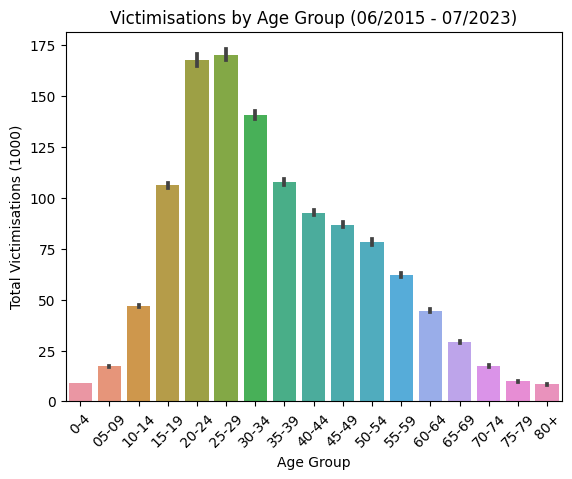

In [31]:
sns.barplot(data=df_demographic.sort_values(by='Age Group'), x='Age Group', y=df_demographic['Victimisations']/1000, estimator=sum)
plt.xticks(rotation=45)
plt.title('Victimisations by Age Group (06/2015 - 07/2023)')
plt.ylabel('Total Victimisations (1000)')
plt.show()

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='Date', ylabel='Victimisations'>

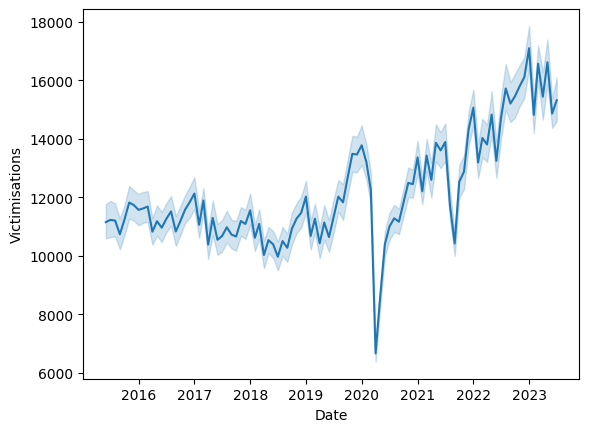

In [34]:
sns.lineplot(x=df_demographic['Date'], y=df_demographic['Victimisations'], estimator=sum)

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='Month Year', ylabel='Victimisations'>

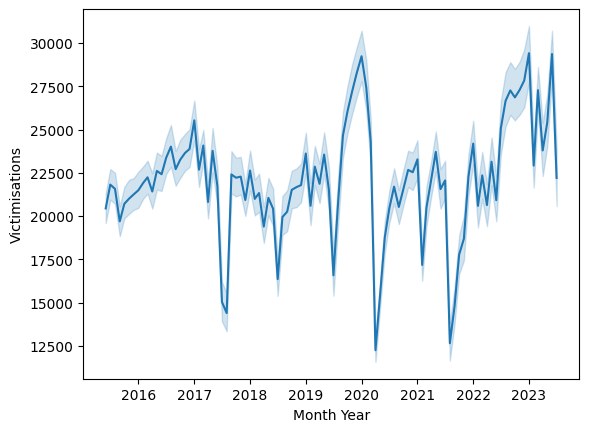

In [42]:
sns.lineplot(data=df_victimisations, x='Month Year', y='Victimisations', estimator=sum)

/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/namhyunkim/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

<Axes: xlabel='Year Month', ylabel='Victimisations'>

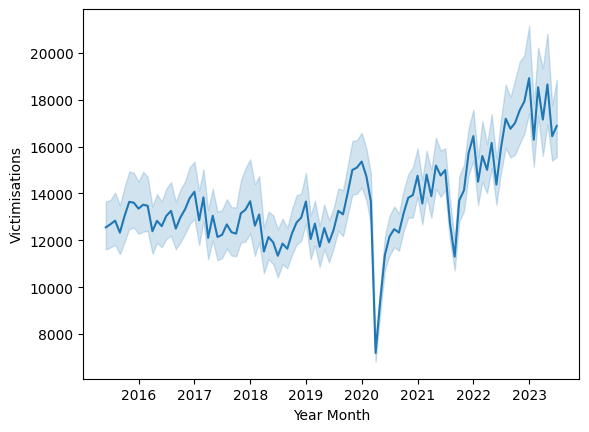

In [45]:
test_df = pd.read_excel('./data/demographic.xlsx')
sns.lineplot(x=test_df['Year Month'], y=test_df['Victimisations'], estimator=sum)